# (ADA) Homework 1: Scoring the Language Model Olympics

---

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Create meaningful visualizations to analyze the data;
- Communicate your findings in a clear and concise manner

---

**Important Dates.**

- Homework release: Fri 04 Oct 2024
- Homework due: Sat 18 Oct 2024, 23:59
- Grade release: Mon 04 Nov 2024

**Some rules**

- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
- Make sure you use the data folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
- Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.
- For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).
- Back up any hypotheses and claims with data, since this is an important aspect of the course.
- Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. If there are multiple notebooks present, we will not grade anything.
- We will not run your notebook for you! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a fully-run and evaluated notebook. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:
- Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
- Some of the TAs on this course literally published many works on detecting machine-generated text.
---

## Context

Context
AI is booming! Newspapers, influencers, and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future looks like…

Freshly graduated from the EPFL, you are hired by the Swiss government to advise on a large-scale “AI integration” initiative code-named **"NEUTRALITY"** (Navigating Efficient Upgrades Through Robust Artificial Learning Integration Techniques Yearly). Convinced by the stunning progress in language modeling, the government would like to battle the growing shortages in the education sector by using LMs. Your job description: investigate which LMs might be best suited!

You are given the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, Horta-Ribeiro, the intern responsible for collecting the results, didn’t take EPFL’s famous ADA course. As a result, the collected datasets are slightly corrupted.

### A very brief primer on Language Models
Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project NEUTRALITY’s objectives:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 PROJECT_NEUTRALITY
│
├── 📄 analysis.ipynb (the file you're currently reading!)
├── 📄 requirements.txt (install into your environment)
│
├── 📁 task_1
├── 📁 task_2
└── 📁 task_2.5
```   
 

In [1]:
# please make sure you install the packages listed in the requirements.txt file in your environment!
# using pip
# pip install -r requirements.txt
#
# using Conda:
# conda create --name <env_name> --file requirements.txt
#
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── df_mmlu/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `df_mmlu` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [2]:
lm_folder = './task_1/df_mmlu/'
mmlu_folder = './task_1/mmlu_data/'

In [3]:
df_test = pd.read_csv(mmlu_folder + 'test.csv')
df_x = pd.read_csv(lm_folder + 'lm_X.csv')
df_y = pd.read_csv(lm_folder + 'lm_Y.csv')
df_z = pd.read_csv(lm_folder + 'lm_Z.csv')

In [4]:
df_test.head()

,question,A,B,C,D,answer,subject,question_id
0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,0
1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,1
2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,2
3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,3
4,Find the product of the given polynomials in t...,2x^2 + 5,6x^2 + 4x + 6,0,x^2 + 1,B,abstract algebra,4


In [5]:
df_test.shape

(14042, 8)

In [6]:
df_x.head()

,question_id,result
0,0,B
1,1,C
2,2,D
3,3,B
4,4,Answer: B


In [7]:
df_x.shape

(13882, 2)

In [8]:
df_y.head()

,question_id,result
0,0,Answer: D
1,1,D
2,2,Answer: D
3,3,NaN
4,4,D


In [9]:
df_y.shape

(13978, 2)

In [10]:
df_z.head()

,question_id,result
0,0,B
1,1,Answer: B
2,2,C
3,3,B
4,4,B


In [11]:
df_z.shape

(13923, 2)

### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [12]:
# A
df_x["result"].value_counts()

result
A                                                                                                                 2733
A                                                                                                                 1657
B                                                                                                                 1412
Answer: A                                                                                                         1398
C                                                                                                                 1134
                                                                                                                  ... 
judicial activism, so the answer is A                                                                                1
creating insurmountable obstacles to the founding of factions, so the answer is A                                    1
A congressperson who retires to take a po

In [13]:
df_y["result"].value_counts()

result
D                                                                                                2894
Answer: D                                                                                        1718
C                                                                                                1701
B                                                                                                1240
D                                                                                                1145
                                                                                                 ... 
Where the energy of interaction between the atoms is at its minimum value, so the answer is A       1
leaves more viable offspring than others of its species., so the answer is D                        1
A and C only, so the answer is D                                                                    1
ADP + P → ATP, so the answer is D                                          

In [14]:
df_z["result"].value_counts()

result
D                                                                                   2257
C                                                                                   2191
B                                                                                   2127
A                                                                                   2060
Answer: D                                                                            777
                                                                                    ... 
omission of a universal suffrage clause, so the answer is D                            1
declare war, so the answer is D                                                        1
state and local governments, by means of federal funding, so the answer is B           1
less clearly identified with consistent political ideologies, so the answer is B       1
Rahit, so the answer is B                                                              1
Name: count, L

There are many different answers: written answers, additional space, nan, "none of the above".

In [15]:
result_x = {}
for r in df_x["result"]:
    if r not in result_x:
        result_x[r] = 1
    else:
        result_x[r] += 1

In [16]:
result_x

{'B': 1412,
 'C': 1134,
 'D ': 596,
 'B ': 793,
 'Answer: B': 760,
 'A': 2733,
 'Answer: D': 613,
 'Answer: C': 594,
 'Answer: A': 1398,
 'Not Sure': 73,
 'A ': 1657,
 'C ': 622,
 nan: 170,
 'D': 1124,
 'None of the above': 69,
 '3, so the answer is B': 1,
 'is prevented from everting by papillary muscles., so the answer is B': 1,
 'lingual branch of the mandibular trigeminal nerve., so the answer is A': 1,
 'These craters contain the only permanently shadowed regions on Mercury, so the answer is D': 1,
 'Unsafe practices, Wants, Fear, Trivial, so the answer is A': 1,
 'phosphofructokinase., so the answer is D': 1,
 'They provide access to phosphorus, an essential element that is limited in many kinds of soils., so the answer is C': 1,
 'Lead to death due to an inability of the cell to pass electrons to oxygen, thus stopping aerobic respiration and asphyxiating the cells., so the answer is A': 1,
 'creatine phosphorylation., so the answer is B': 1,
 'Mass of the moon, so the answer is 

### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [17]:
def clean_answer(s, pattern):

    return str(s).replace(pattern, '')

In [25]:
all_df = [df_x, df_y, df_z]
all_df_filtered = []

for df in all_df:

    df["len"] = df["result"].apply(lambda x: len(str(x)))
    df_filtered = df.loc[df["len"] <= 10].copy(deep=True)

    df = df.drop('len', axis=1)
    df_filtered = df_filtered.drop('len', axis=1)

    df_filtered["result"] = df_filtered["result"].apply(lambda x: clean_answer(clean_answer(x, pattern=' '), pattern="Answer:"))
    df_filtered = df_filtered.loc[(df_filtered["result"] != "NotSure") & (df_filtered["result"] != "nan")]

    all_df_filtered.append(df_filtered)

In [26]:
all_df_filtered[0]

,question_id,result
0,0,B
1,1,C
2,2,D
3,3,B
4,4,B
...,...,...
13877,14037,A
13878,14038,A
13879,14039,B
13880,14040,B


In [20]:
all_df_filtered[0]["result"].value_counts()

result
A    5788
B    2965
C    2350
D    2333
Name: count, dtype: int64

C. /Discuss:/

In [29]:
df_test.head()

,question,A,B,C,D,answer,subject,question_id
0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,0
1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,1
2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,2
3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,3
4,Find the product of the given polynomials in t...,2x^2 + 5,6x^2 + 4x + 6,0,x^2 + 1,B,abstract algebra,4


### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [124]:
models = ['X', 'Y', 'Z']

In [123]:
models = ['X', 'Y', 'Z']

for i, df in enumerate(all_df_filtered):
    df = pd.merge(df, df_test, how="inner", on="question_id")

    df["correct"] = np.where(df['result'] == df['answer'], 1, 0)

    avg_score = df["correct"].mean()

    print(f'Average score of model {models[i]}: {avg_score : .2%}')
    all_df_filtered[i] = df
    



KeyError: 'answer'

### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X since: (200 - 181) / 181 > 0.10

In [90]:
def difference(df_1, df_2, name_1, name_2):

    col1 = df_1["subject"].value_counts().sort_index()
    col2 = df_2["subject"].value_counts().sort_index()

    diff = np.abs(col2 - col1) / col1
    unbalance_subjects = diff.loc[diff > 0.1]
    print(f'From the perspective of {name_1} with respect to {name_2}: ')
    for topic, value in unbalance_subjects.items():
        print(f'{topic}: {value * 100 : 2.0f} %')



In [92]:
difference(all_df_filtered[0], all_df_filtered[1], "X", "Y")

From the perspective of X with respect to Y: 
formal logic:  13 %
logical fallacies:  12 %
moral scenarios:  17 %


In [93]:
difference(all_df_filtered[0], all_df_filtered[2], "X", "Z")

From the perspective of X with respect to Z: 
college chemistry:  12 %
college computer science:  13 %
moral disputes:  24 %


In [94]:
difference(all_df_filtered[1], all_df_filtered[0], "Y", "X")

From the perspective of Y with respect to X: 
formal logic:  11 %
logical fallacies:  13 %
moral scenarios:  15 %


In [95]:
difference(all_df_filtered[1], all_df_filtered[2], "Y", "Z")

From the perspective of Y with respect to Z: 
college chemistry:  14 %
college computer science:  14 %
computer security:  11 %
moral disputes:  18 %
moral scenarios:  11 %


In [96]:
difference(all_df_filtered[2], all_df_filtered[0], "Z", "X")

From the perspective of Z with respect to X: 
college chemistry:  14 %
college computer science:  15 %
high school geography:  11 %
moral disputes:  32 %


In [97]:
difference(all_df_filtered[2], all_df_filtered[1], "Z", "Y")

From the perspective of Z with respect to Y: 
college chemistry:  17 %
college computer science:  17 %
computer security:  13 %
medical genetics:  10 %
moral disputes:  22 %
moral scenarios:  12 %


In [66]:
result = all_df_filtered[0].groupby("subject")["correct"].sum()
result

subject
abstract algebra                         70
anatomy                                 100
astronomy                               108
business ethics                          72
clinical knowledge                      205
college biology                         114
college chemistry                        72
college computer science                 73
college mathematics                      77
college medicine                        123
college physics                          77
computer security                        77
conceptual physics                      175
econometrics                             90
electrical engineering                  110
elementary mathematics                  281
formal logic                             86
global facts                             74
high school biology                     223
high school chemistry                   149
high school computer science             76
high school european history            114
high school geography   

In [ ]:
# B

In [ ]:
# C

## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's NEUTRALITY project. Ms. Sakota is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, she orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── df_mmlu_mmlu.csv
│
└── df_mmlu_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `df_mmlu_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [331]:
# PROVIDED CODE
df_mmlu = pd.read_csv('task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('task_2/lm_scores_other.csv')

In [99]:
df_mmlu.head()

,result,question_id,question,A,B,C,D,answer,subject,correct,model_name
0,B,0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,True,X
1,C,1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,True,X
2,D,2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,True,X
3,B,3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,True,X
4,D,7,Statement 1 | A ring homomorphism is one to on...,"True, True","False, False","True, False","False, True",D,abstract algebra,True,X


In [100]:
df_other.head()

,result,question_id,question,A,B,C,D,answer,correct,model_name
0,B,0,Which factor will most likely cause a person t...,a leg muscle relaxing after exercise,a bacterial population in the bloodstream,several viral particles on the skin,carbohydrates being digested in the stomach,B,True,X
1,B,1,Lichens are symbiotic organisms made of green ...,carbon dioxide,food,protection,water,B,True,X
2,D,2,When a switch is used in an electrical circuit...,cause the charge to build.,increase and decrease the voltage.,cause the current to change direction.,stop and start the flow of current.,D,True,X
3,A,3,Which of the following is an example of an ass...,contact lens,motorcycle,raincoat,coffee pot,A,True,X
4,C,4,"Rocks are classified as igneous, metamorphic, ...",their color,their shape,how they formed,the minerals they contain,C,True,X


In [104]:
# df_mmlu["model_name"].value_counts()["X"] = Y = Z = 11696

11696

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

Old method
true = df.groupby("model_name")["correct"].value_counts()[model][True]
results_tot = df.groupby("model_name")["correct"].count()[model]
accuracy = true / results_tot

In [211]:
def accuracy_and_std(df, model, df_name):
    
    mean = round(df.groupby("model_name")["correct"].mean()[model] * 100, 2)
    std = round(df.groupby("model_name")["correct"].std()[model] * 100, 2)

    print(f'Model {model} and dataset {df_name}, mean accuracy: {mean : 0.2f} % and std: {std : 0.2f}')

    return mean, std
        

In [212]:
models = ['X', 'Y', 'Z']
datasets = [df_mmlu, df_other]
dataset_names = ["df_mmlu", "df_other"]

mean_all = np.zeros((2, 3))
std_all = np.zeros((2, 3))

for i, model in enumerate(models):
    for j, dataset in enumerate(datasets):
        mean, std = accuracy_and_std(dataset, model, dataset_names[j])
        mean_all[j, i] = mean
        std_all[j, i] = std

0 0
Model X and dataset df_mmlu, mean accuracy:  74.36 % and std:  43.67
0 1
Model X and dataset df_other, mean accuracy:  78.80 % and std:  40.88
1 0
Model Y and dataset df_mmlu, mean accuracy:  76.15 % and std:  42.62
1 1
Model Y and dataset df_other, mean accuracy:  72.09 % and std:  44.86
2 0
Model Z and dataset df_mmlu, mean accuracy:  65.60 % and std:  47.51
2 1
Model Z and dataset df_other, mean accuracy:  67.17 % and std:  46.96


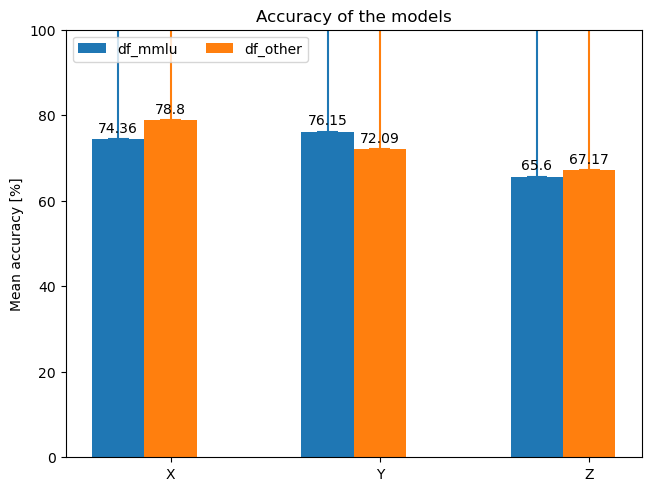

In [215]:
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for i, mean in enumerate(mean_all):

    offset = width * multiplier
    rects = ax.bar(x + offset, mean, width, label=dataset_names[i])
    ax.bar_label(rects, padding=3)
    ax.errorbar(x + offset, mean, xerr = 0.05, yerr = 2 * std_all[i], linestyle='') # 2 to get 95% confidence
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean accuracy [%]')
ax.set_title('Accuracy of the models')
ax.set_xticks(x + width, models)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 100)

plt.show()

C. /Discuss:/
Std are huge! the accuracy seems comparable for both datasets 

### 2.2 (5 pt)

Ms. Sakota has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

In [237]:
def correct_answers(df, model):

    A = df.groupby(["model_name", "answer"])["correct"].value_counts()[model]["A"][True]
    B = df.groupby(["model_name", "answer"])["correct"].value_counts()[model]["B"][True]
    C = df.groupby(["model_name", "answer"])["correct"].value_counts()[model]["C"][True]
    D = df.groupby(["model_name", "answer"])["correct"].value_counts()[model]["D"][True]

    return A, B, C, D

In [238]:
correct_A = np.zeros((2, 3))
correct_B = np.zeros((2, 3))
correct_C = np.zeros((2, 3))
correct_D = np.zeros((2, 3))

models = ['X', 'Y', 'Z']
datasets = [df_mmlu, df_other]
dataset_names = ["df_mmlu", "df_other"]

for i, model in enumerate(models):
    for j, dataset in enumerate(datasets):
        A, B, C, D = correct_answers(dataset, model)
        correct_A[j, i] = A
        correct_B[j, i] = B
        correct_C[j, i] = C
        correct_D[j, i] = D

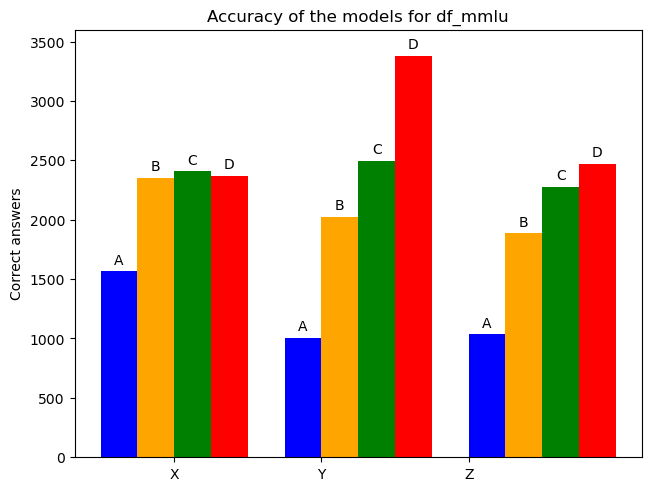

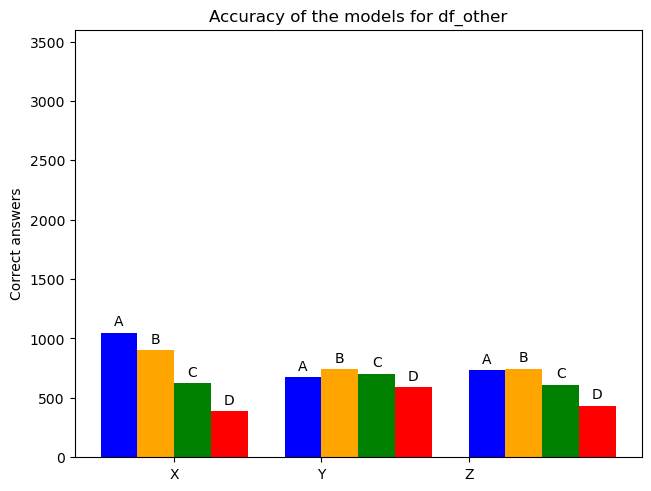

In [264]:
# for bar plot, should we say how many correct out of total?

# Organize all correct values into one list of arrays
correct_data = [correct_A, correct_B, correct_C, correct_D]
bar_labels = ['A', 'B', 'C', 'D']  # Labels for each bar
colors = ['blue', 'orange', 'green', 'red']  # Colors for A, B, C, D

width = 0.2  # Width of each bar

# Create separate plots for each dataset
for j, dataset_name in enumerate(dataset_names):
    fig, ax = plt.subplots(layout='constrained')
    x = np.arange(len(models))  # X-axis label locations for the models
    
    # Plot bars for A, B, C, D for the current dataset
    for i in range(len(correct_data)):  # Loop over A, B, C, D
        offset = width * i  # Calculate the offset for each bar group
        rects = ax.bar(x + offset, correct_data[i][j], width, color=colors[i])
        
        # Label each bar with the corresponding letter (A, B, C, D)
        ax.bar_label(rects, labels=[bar_labels[i]] * len(rects), padding=3)


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Correct answers')
    ax.set_title(f'Accuracy of the models for {dataset_name}')
    ax.set_xticks(x_with_space + 1.5 * width, models)  # Centering the model labels
    ax.set_ylim(0, 3600)

    plt.show()

Step 1: State the Hypotheses
Null Hypothesis (
�
0
H 
0
​
 ): There is no significant difference in the distribution of correct answers between the two datasets. (The datasets are independent.)
Alternative Hypothesis (
�
�
H 
a
​
 ): There is a significant difference in the distribution of correct answers between the two datasets. (The datasets are not independent.)

In [265]:
from scipy.stats import chi2_contingency

# Step 1: Format the data as a 2D array
# Combine the counts for A, B, C, D across the two datasets
data = np.array([
    [correct_A[0].sum(), correct_B[0].sum(), correct_C[0].sum(), correct_D[0].sum()],  # Dataset 1 (row 0)
    [correct_A[1].sum(), correct_B[1].sum(), correct_C[1].sum(), correct_D[1].sum()]   # Dataset 2 (row 1)
])

# Step 2: Perform the Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(data)

# Step 3: Output the results
alpha = 0.05  # significance level

print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Step 4: Conclusion based on the p-value
if p_value < alpha:
    print("Reject the null hypothesis (H0). There is a significant difference in the distribution of correct answers between the two datasets.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant difference in the distribution of correct answers between the two datasets.")

Chi-square Statistic: 1443.1619101339897
P-value: 0.0
Degrees of Freedom: 3
Expected Frequencies:
 [[4580.53404236 6531.75395095 6889.67896514 7274.03304156]
 [1485.46595764 2118.24604905 2234.32103486 2358.96695844]]
Reject the null hypothesis (H0). There is a significant difference in the distribution of correct answers between the two datasets.


Interpretation
Chi-square Statistic (1443.16):

The Chi-square statistic measures how far the observed counts deviate from the expected counts under the null hypothesis (that there is no difference between the datasets). A value of 1443.16 is very large, suggesting that the distribution of correct answers in the two datasets differs significantly. This value is indicative of a strong association between the dataset and the correct answers.
P-value (0.0):

A p-value of 0.0 (or effectively zero) indicates that the probability of observing such a large Chi-square statistic under the null hypothesis is extremely low. This provides strong evidence against the null hypothesis.
In statistical terms, we can say that the observed data is highly inconsistent with the null hypothesis, leading us to reject it. This means there is strong evidence to support the claim that the distributions of correct answers between the two datasets differ significantly.
Degrees of Freedom (3):

The degrees of freedom in this context, calculated as 
(
number of rows
−
1
)
×
(
number of columns
−
1
)
(number of rows−1)×(number of columns−1) (i.e., 
(
2
−
1
)
×
(
4
−
1
)
=
3
(2−1)×(4−1)=3), indicates the number of independent comparisons that can be made. The larger the degrees of freedom, the more reliable the Chi-square approximation.
Expected Frequencies:

The expected frequencies tell us what the counts for A, B, C, and D would be if the two datasets were similar in their distributions. The fact that the observed counts deviate significantly from these expected frequencies supports the conclusion that there are indeed differences in the distributions.
For instance, the expected frequency for A in dataset 1 is about 4580.53, while the observed count (e.g., correct_A[0].sum()) appears to be much higher than expected, indicating that the first dataset may be scoring significantly better in that category.
Conclusion
Overall Conclusion:

Based on the results of the Chi-square test, we reject the null hypothesis (
�
0
H 
0
​
 ). This means there is statistically significant evidence to conclude that the distribution of correct answers between the two datasets (df_mmlu and df_other) differs significantly.
Practically, this could imply that the models used to generate answers in these two datasets yield different accuracies, indicating potential differences in the underlying data characteristics, the models' performance, or both.
Implications:

The results suggest that the choice of dataset has a substantial impact on the accuracy of answers provided by the models. This could lead to further investigation into why such differences exist—whether due to dataset characteristics, the nature of the questions, or other factors.
Depending on your objectives, you may want to delve deeper into the nature of the differences. For example, visualizing the results using bar charts could help illustrate where the discrepancies lie between the datasets in terms of correct answers across the categories (A, B, C, D).

### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [271]:
def accuracy(answer, sum_true):

    return round(answer / sum_true * 100, 2)

In [278]:
datasets = [df_mmlu, df_other]
dataset_names = ["df_mmlu", "df_other"]
acc_A = []

for j, df in enumerate(datasets):
    A, B, C, D = correct_answers(df, "X")
    sum_true = df[(df["model_name"] == "X") & (df["correct"] == True)].shape[0]
    acc_A.append(accuracy(A, sum_true))
    print(f'Model X and dataset {dataset_names[j]}\nAccuracy on A: {accuracy(A, sum_true)} %\nAccuracy on B: {accuracy(B, sum_true)} %\nAccuracy on C: {accuracy(C, sum_true)} %\nAccuracy on D: {accuracy(D, sum_true)} %')

Model X and dataset df_mmlu
Accuracy on A: 18.02 %
Accuracy on B: 27.04 %
Accuracy on C: 27.7 %
Accuracy on D: 27.24 %
Model X and dataset df_other
Accuracy on A: 35.45 %
Accuracy on B: 30.38 %
Accuracy on C: 21.1 %
Accuracy on D: 13.07 %


Null hypothesis (H₀): There is no difference in the mean performance (accuracy) of Language Model X for the correct answer "A" between the two datasets.

Alternative hypothesis (H₁): There is a difference in the mean performance of Language Model X for the correct answer "A" between the two datasets.

If the p-value is smaller than your significance level (typically 0.05 for a 95% CI), you can reject the null hypothesis.


In [279]:
acc_A

[18.02, 35.45]

In [287]:
xmmlu_A = df_mmlu[(df_mmlu['model_name'] == 'X') & (df_mmlu['answer'] == 'A')]['correct']
xmmlu_A = mmlu_A.astype(int)  # True becomes 1, False becomes 0

xother_A = df_other[(df_other['model_name'] == 'X') & (df_other['answer'] == 'A')]['correct']
xother_A = other_A.astype(int)

In [289]:
from scipy.stats import ttest_ind

# Perform a two-sample T-test
t_stat, p_value = ttest_ind(mmlu_A, other_A, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -0.21161116511164932
P-value: 0.8324287723934077


The p-value is greater than 0.05,so I fail to reject the null hypothesis, meaning the performance of Model X when the correct answer is "A" is not significantly different between the two datasets.

In [291]:
# confidence interval
import scipy.stats as stats


# Calculate the mean difference
mean_diff = np.mean(mmlu_A) - np.mean(other_A)

# Standard error of the difference in means
se_diff = np.sqrt(np.var(mmlu_A) / len(mmlu_A) + np.var(other_A) / len(other_A))

# Confidence interval at 95%
ci_lower = mean_diff - stats.t.ppf(0.975, df=min(len(mmlu_A), len(other_A)-1)) * se_diff
ci_upper = mean_diff + stats.t.ppf(0.975, df=min(len(mmlu_A), len(other_A)-1)) * se_diff

print("Confidence Interval: ({}, {})".format(ci_lower, ci_upper))


Confidence Interval: (-0.013741742881110613, 0.011065337970068905)


### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [292]:
# First, combine both datasets into one DataFrame, with a new column to distinguish datasets
df_mmlu['dataset'] = 'mmlu'
df_other['dataset'] = 'other'
df_combined = pd.concat([df_mmlu, df_other])

# Group by model_name, answer, and dataset, and calculate the mean accuracy (True/False as 1/0)
mean_accuracies = df_combined.groupby(['model_name', 'answer', 'dataset'])['correct'].mean().reset_index()

# Pivot the table to make it more readable (optional)
pivot_table = mean_accuracies.pivot_table(index=['model_name', 'dataset'], columns='answer', values='correct')

# Print the pivot table for mean accuracies
print(pivot_table)

answer                     A         B         C         D
model_name dataset                                        
X          mmlu     0.972688  0.799185  0.707905  0.633592
           other    0.974026  0.806452  0.676407  0.603744
Y          mmlu     0.623836  0.688073  0.733470  0.904252
           other    0.625232  0.663978  0.762987  0.920437
Z          mmlu     0.643079  0.641182  0.669115  0.661139
           other    0.680891  0.667563  0.662338  0.677067


It looks like for given answer, the mean is almost the same for both models.

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Ms. Sakota. After thinking it over, Ms. Sakota concludes that more tests are needed. She orders a second round of MMLU results. However, the clever Ms. Sakota thinks of the following twist: while keeping questions fixed, she randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── df_mmlu_mmlu_shuffle.csv
```

/Discuss:/ Why would Ms. Sakota do this?

Maybe the models learned the position of the correct answers, so permuting will avoid this.

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `df_mmlu_mmlu.csv` file and the new `df_mmlu_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `df_mmlu_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

In [293]:
df_mmlu_shuffle = pd.read_csv('task_2_5/df_mmlu_mmlu_shuffle.csv')

In [302]:
# List to store results
test_retest_scores = []

# Unique models in the dataset
models = df_mmlu['model_name'].unique()

# Iterate over each model
for model in models:
    # Filter data for the current model
    model_scores = df_mmlu[df_mmlu['model_name'] == model]
    model_shuffle_scores = df_mmlu_shuffle[df_mmlu_shuffle['model_name'] == model]
    
    # Total number of questions (N)
    N = len(model_scores)
    
    # Total number of shuffles (M)
    M = (df_mmlu['answer'].values != df_mmlu_shuffle['answer'].values).sum()    
    # Initialize test-retest score for the model
    test_retest_score = 0
    
    # Iterate over each question
    for question_id in model_scores['question_id'].unique():
        # Correctness for the original question (c_0^i)
        c_0_i = model_scores[model_scores['question_id'] == question_id]['correct'].values[0]
        
        # Correctness for all shuffled versions of the question (c_j^i for each j)
        shuffled_correctness = model_shuffle_scores[model_shuffle_scores['question_id'] == question_id]['correct']
        
        # Compute the average product for this question
        avg_product = (c_0_i * shuffled_correctness).mean()  # Mean over all M shuffles
        
        # Sum for test-retest score
        test_retest_score += avg_product
    
    # Compute final test-retest score for the model
    test_retest_score /= N  # Divide by number of questions
    
    # Store result
    test_retest_scores.append({'model_name': model, 'test_retest_score': test_retest_score})


In [303]:
test_retest_scores

[{'model_name': 'X', 'test_retest_score': 0.588406292749658},
 {'model_name': 'Y', 'test_retest_score': 0.5716484268125855},
 {'model_name': 'Z', 'test_retest_score': 0.44160396716826267}]

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe


[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

In [304]:
# # Answer distribution
answer_distribution = df_mmlu.groupby(['model_name', 'answer']).size().unstack(fill_value=0)
print("Answer Distribution for Each Language Model:")
print(answer_distribution)

# Calculate accuracy conditioned on the answer given
correct_counts = df_mmlu[df_mmlu['correct']].groupby(['model_name', 'answer']).size().unstack(fill_value=0)
total_counts = df_mmlu.groupby(['model_name', 'answer']).size().unstack(fill_value=0)
accuracy = correct_counts.div(total_counts).fillna(0)

print("\nAccuracy Conditioned on the Answer Given:")
print(accuracy)

Answer Distribution for Each Language Model:
answer         A     B     C     D
model_name                        
X           1611  2943  3403  3739
Y           1611  2943  3403  3739
Z           1611  2943  3403  3739

Accuracy Conditioned on the Answer Given:
answer             A         B         C         D
model_name                                        
X           0.972688  0.799185  0.707905  0.633592
Y           0.623836  0.688073  0.733470  0.904252
Z           0.643079  0.641182  0.669115  0.661139


B. /Discuss:/

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage in the West, _Westoda_:

```
"Hmm, correct you are, young padawan, to question how the world is seen by large language models! Simple 'text' it is not, hmm? No, no, no! Characters and words, the way of puny humans, this is not, heh heh heh.

'Tokens', they use, yes! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z'. Chunky blocks of text, they become, yes! 'Hello world', a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, yes! Confusing, it is, hmm?

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.
Meditate on this, you should. The force of natural language processing, strong it is. But patience, you must have, my young padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Yes, hmmm!"
```

Admittingly, Westoda at times speaks in riddles… However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [305]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

humans see: "hello world" --> language models see: [24912, 2375]


### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

In [313]:
from collections import Counter


In [308]:
df_mmlu["tokens"] = df_mmlu["question"].apply(tokenize_text)

In [336]:
def plot_token_distribution(name_col_tok:str, type:str):

    # Flattening the list of tokens for counting
    all_tokens = [token for sublist in df_mmlu[name_col_tok] for token in sublist]

    # Counting frequency of each token
    token_counts = Counter(all_tokens)

    # Creating a dataframe for token counts
    token_df = pd.DataFrame(token_counts.items(), columns=['Token', 'Frequency'])
    token_df['Log_Frequency'] = np.log1p(token_df['Frequency'])  # log1p is log(1 + x) to avoid log(0) issues

    # Plotting the token frequency distribution
    plt.figure(figsize=(10, 6))
    plt.bar(token_df['Token'], token_df['Log_Frequency'])
    plt.xlabel('Token')
    plt.ylabel('Log-Transformed Frequency')
    plt.title(f'Log-Transformed {type} Token Frequency Distribution')
    plt.xticks(rotation=90)
    plt.show()


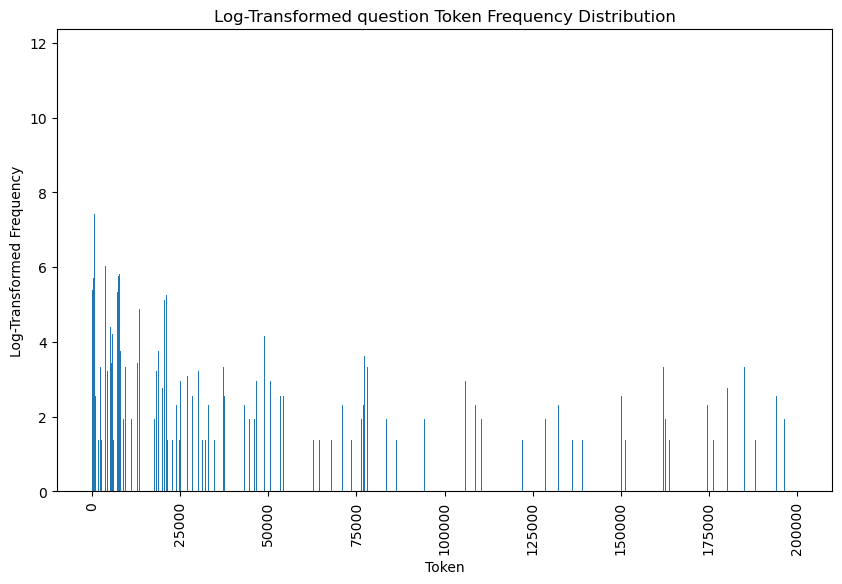

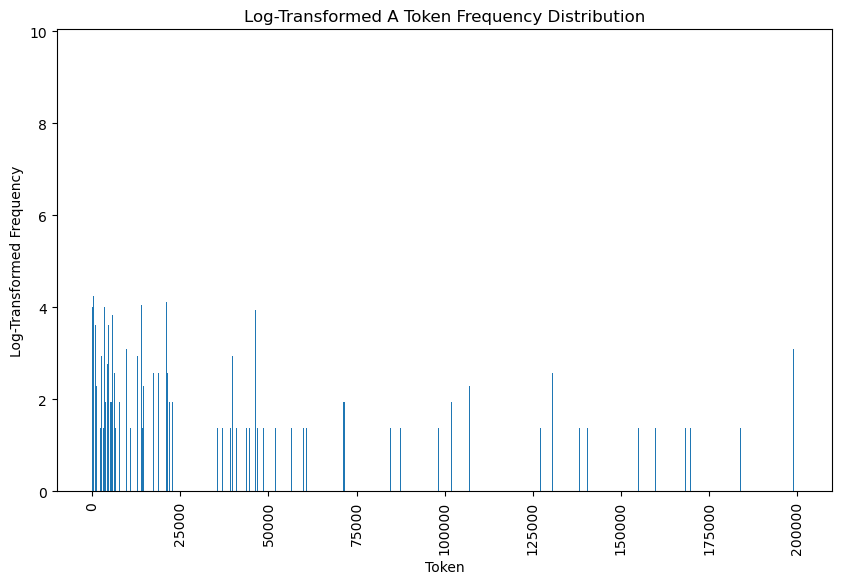

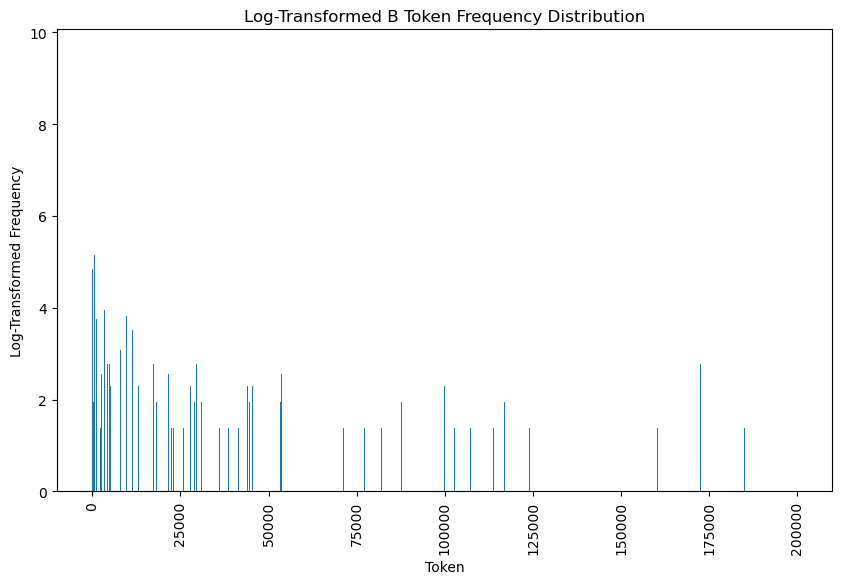

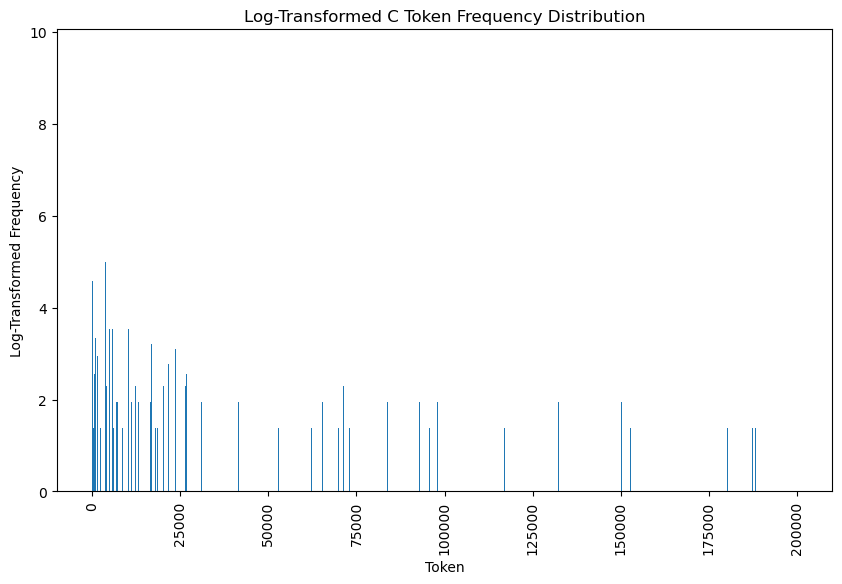

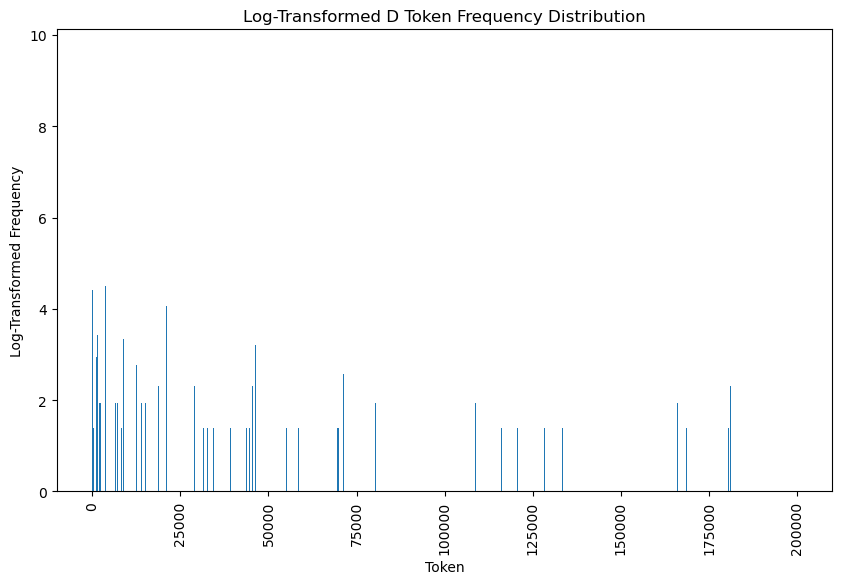

In [337]:
cols = ["question", "A", "B", "C", "D"]
for col in cols:
    df_mmlu[col+"_tok"] = df_mmlu[col].apply(tokenize_text)
    plot_token_distribution(name_col_tok=col+"_tok", type= col)


In [360]:
# isolate tokens
# Flatten tokens for "A", "B", "C", "D" (convert to list if not already)
letters_tok = []
for col in cols[1:]:
    tok = tokenize_text(col)[0]
    letters_tok.append(tok)

In [364]:
tok_dict = dict.fromkeys(letters_tok, 0)

In [366]:
token_columns = ["question_tok", "A_tok", "B_tok", "C_tok", "D_tok"]
# Iterate over the token columns and count occurrences of tokens
for col in token_columns:
    df_mmlu[col].apply(lambda tokens: [tok_dict.update({tok: tok_dict.get(tok, 0) + 1}) for tok in tokens if tok in tok_dict])

In [368]:
# Calculate the total occurrences of all tokens
total_count = sum(tok_dict.values())

# Calculate and print the relative distribution of each token
print("Relative Distribution of Tokens:")
for token, count in tok_dict.items():
    relative_frequency = count / total_count if total_count > 0 else 0
    print(f"Token {token}: {relative_frequency:.2%}")
    

Relative Distribution of Tokens:
Token 32: 78.86%
Token 33: 5.90%
Token 34: 10.38%
Token 35: 4.86%


### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each combined question-answers pair, compute: 
1. the number of "A", "B", "C", and "D" tokens; and
2. the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [ ]:
# A

B. /Discuss:/

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

In [ ]:
# A

B. /Dicsuss:/

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

**hint**
- Try to use the MECE framework: _Mutually Exclusive Collectively Exhaustive_

/Discuss:/
1. 

2. 

3. 

4. 